 **DSCI-633 Final Project
By Omkar Narkar**



**Importing all the required libraries and packages**

In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

DiabeticsDF = pd.read_csv('/content/diabetic_data_train.csv')
DiabeticsDF_test = pd.read_csv('/content/diabetic_data_test.csv')

DiabeticsDF.head(10)

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,93634,338369606,159605546,AfricanAmerican,Male,[70-80),?,1,23,7,3,MC,?,63,0,7,0,0,0,38,294,?,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,27698,90739116,83232054,Caucasian,Female,[70-80),[75-100),3,1,1,1,MC,Cardiology,54,6,8,0,0,0,414,411,996,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
2,17488,64286964,95117913,Caucasian,Male,[60-70),?,3,1,1,4,?,?,51,1,19,0,0,0,513,250,553,4,None,None,Up,No,No,No,No,No,No,Steady,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30
3,96510,376610012,136697972,AfricanAmerican,Male,[40-50),?,3,1,1,2,BC,?,16,0,7,0,0,0,558,724,401,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
4,35774,110557278,2851308,Caucasian,Male,[80-90),?,1,1,6,1,MC,Family/GeneralPractice,64,0,3,0,0,0,789,250,401,5,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
5,74984,224162346,109195155,Caucasian,Male,[80-90),?,1,6,7,2,HM,?,51,0,14,7,0,0,427,728,424,9,None,>8,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
6,76129,229518798,41356647,Caucasian,Female,[60-70),?,3,1,1,2,UN,Surgery-Vascular,39,3,13,0,0,2,996,585,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,<30
7,50738,152125260,24827607,AfricanAmerican,Male,[60-70),?,3,1,1,1,BC,Cardiology,27,6,15,0,0,0,414,411,401,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
8,6348,31596888,2942856,Caucasian,Male,[40-50),?,3,1,1,10,?,Surgery-Cardiovascular/Thoracic,65,6,31,0,0,0,414,998,250.51,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
9,16967,63003072,13168413,Caucasian,Male,[80-90),?,1,18,7,5,?,Family/GeneralPractice,60,0,12,0,0,0,486,250.01,428,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO


**Correlation Matrix**

In [ ]:
DiabeticsDF.corr()

corr_matrix = DiabeticsDF.copy()

for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":  # Check for string values
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
        

corr_matrix = corr_matrix.corr(method="pearson")

plt.figure(figsize=(30,10))

sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="Blues", cbar=True, linewidths=0.5)
plt.title("pearson correlation")



                                                 



**Checking and plotting the unique values of race**

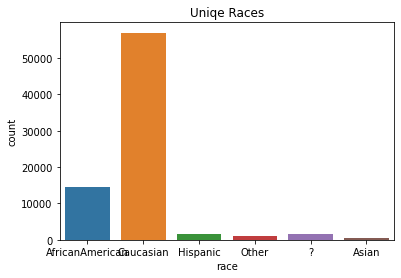

Unique Races
Caucasian          74.600388
AfricanAmerican    19.022850
?                   2.237828
Hispanic            1.988889
Other               1.519836
Asian               0.630208
Name: race, dtype: float64


In [307]:
DiabeticsDF['race'].unique()
sns.countplot(x=DiabeticsDF.race,data= DiabeticsDF)
plt.xticks()
plt.title("Uniqe Races")
plt.show()

print("Unique Races")
print(DiabeticsDF.race.value_counts(normalize = True)*100 )

Pre-Processing the training data:




In [323]:
DiabeticsDF = DiabeticsDF.drop(['encounter_id','weight','payer_code','medical_specialty','diag_1', 'diag_2', 'diag_3','citoglipton','examide'], axis=1) #dropping the diagnosis for now if required will consider it again later

DiabeticsDF = DiabeticsDF.drop(DiabeticsDF.index[DiabeticsDF['discharge_disposition_id'].isin([11 , 13, 14, 19, 20, 21])])

DiabeticsDF = DiabeticsDF.replace('?',np.NAN)

#DiabeticsDF['race'] = DiabeticsDF['race'].fillna(DiabeticsDF['race'].mode()[0],inplace=True)

DiabeticsDF["race"].fillna(DiabeticsDF["race"].mode()[0], inplace = True)
DiabeticsDF.gender.replace('Unknown/Invalid', np.nan , inplace=True)
DiabeticsDF.dropna(subset=['gender'], how='all', inplace = True) 

def cat_to_binary(x):
  if x == '<30':
    x=1
  else:  
    x=0
  return x

DiabeticsDF['readmitted'] = DiabeticsDF['readmitted'].apply(cat_to_binary)

DiabeticsDF = DiabeticsDF.drop_duplicates(subset=['patient_nbr'])

DiabeticsDF = DiabeticsDF.drop(['patient_nbr'],axis=1)

DiabeticsDF.head(20)


,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,93634,AfricanAmerican,Male,[70-80),1,23,7,3,63,0,7,0,0,0,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,27698,Caucasian,Female,[70-80),3,1,1,1,54,6,8,0,0,0,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
2,17488,Caucasian,Male,[60-70),3,1,1,4,51,1,19,0,0,0,4,None,None,Up,No,No,No,No,No,No,Steady,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0
3,96510,AfricanAmerican,Male,[40-50),3,1,1,2,16,0,7,0,0,0,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
4,35774,Caucasian,Male,[80-90),1,1,6,1,64,0,3,0,0,0,5,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
5,74984,Caucasian,Male,[80-90),1,6,7,2,51,0,14,7,0,0,9,None,>8,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
6,76129,Caucasian,Female,[60-70),3,1,1,2,39,3,13,0,0,2,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
7,50738,AfricanAmerican,Male,[60-70),3,1,1,1,27,6,15,0,0,0,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
8,6348,Caucasian,Male,[40-50),3,1,1,10,65,6,31,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
9,16967,Caucasian,Male,[80-90),1,18,7,5,60,0,12,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0


**Checking for null values in training data**

In [318]:
DiabeticsDF.isnull().sum()

Unnamed: 0                  0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-

**Pre-Processing the Test Data**

In [324]:
DiabeticsDF_test = DiabeticsDF_test.drop(['encounter_id','weight','payer_code','medical_specialty','diag_1', 'diag_2', 'diag_3','citoglipton','examide'], axis=1) #dropping the diagnosis for now if required will consider it again later

DiabeticsDF_test = DiabeticsDF_test.drop(DiabeticsDF_test.index[DiabeticsDF_test['discharge_disposition_id'].isin([11 , 13, 14, 19, 20, 21])])

DiabeticsDF_test = DiabeticsDF_test.replace('?',np.NAN)

#DiabeticsDF_test['race'] = DiabeticsDF_test['race'].fillna(DiabeticsDF_test['race'].mode()[0],inplace=True)
DiabeticsDF_test["race"].fillna(DiabeticsDF["race"].mode()[0], inplace = True)
DiabeticsDF_test.gender.replace('Unknown/Invalid', np.nan , inplace=True)
DiabeticsDF_test.dropna(subset=['gender'], how='all', inplace = True)
def cat_to_binary(x):
  if x == '<30':
    x=1
  else:  
    x=0
  return x

DiabeticsDF_test['readmitted'] = DiabeticsDF_test['readmitted'].apply(cat_to_binary)

DiabeticsDF_test = DiabeticsDF_test.drop_duplicates(subset=['patient_nbr'])

DiabeticsDF_test = DiabeticsDF_test.drop(['patient_nbr'],axis=1)

DiabeticsDF_test.head(20)

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,77011,Caucasian,Female,[80-90),1,3,7,11,82,4,28,0,0,0,9,None,None,No,No,No,No,No,No,No,Steady,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0
1,95048,Caucasian,Female,[30-40),1,1,7,5,44,0,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,29619,AfricanAmerican,Male,[70-80),2,1,1,1,39,0,7,0,0,0,4,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0
3,85031,Caucasian,Male,[70-80),3,6,1,3,1,2,22,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
4,13003,AfricanAmerican,Female,[70-80),3,18,1,6,35,3,29,0,0,0,6,None,None,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0
5,89615,Caucasian,Female,[50-60),1,1,7,3,37,0,6,0,0,0,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
6,90571,Caucasian,Male,[60-70),2,1,1,2,30,1,10,2,0,0,7,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
7,53257,Asian,Female,[80-90),2,3,7,3,34,1,10,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
8,78407,Caucasian,Male,[30-40),3,1,1,2,6,6,6,0,0,0,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
9,58149,AfricanAmerican,Male,[50-60),1,1,7,3,31,6,14,0,0,0,8,None,None,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0


**Checking for null values in test data**

In [325]:
DiabeticsDF.isnull().sum()

Unnamed: 0                  0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-

**Making a list of all the categorical columns**

In [326]:
cat_cols = []
for c in DiabeticsDF.columns:
    if DiabeticsDF[c].dtype == object:
        cat_cols.append(c)
print(cat_cols)

['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


In [327]:
DiabeticsDF.columns == DiabeticsDF_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

**Combining both train and test data for OneHotEncoding**

In [328]:
DiabeticsDF['train_positive'] = 1 #added this column to the data to be able to differentiate between train and test data later
DiabeticsDF_test['train_positive'] = 0

full_data = pd.concat([DiabeticsDF,DiabeticsDF_test],axis=0,ignore_index=True)
full_data

,Unnamed: 0,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,train_positive
0,93634,AfricanAmerican,Male,[70-80),1,23,7,3,63,0,7,0,0,0,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1
1,27698,Caucasian,Female,[70-80),3,1,1,1,54,6,8,0,0,0,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1
2,17488,Caucasian,Male,[60-70),3,1,1,4,51,1,19,0,0,0,4,None,None,Up,No,No,No,No,No,No,Steady,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0,1
3,96510,AfricanAmerican,Male,[40-50),3,1,1,2,16,0,7,0,0,0,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1
4,35774,Caucasian,Male,[80-90),1,1,6,1,64,0,3,0,0,0,5,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77903,24719,Caucasian,Male,[70-80),2,1,1,7,70,5,23,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,Up,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1,0
77904,19241,Caucasian,Male,[50-60),1,3,7,6,48,2,12,0,0,0,9,None,None,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0,0
77905,62768,Caucasian,Male,[50-60),3,1,7,5,43,0,18,0,1,0,8,None,None,Down,No,No,No,No,No,Steady,No,No,No,Steady,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,0,0
77906,46177,Caucasian,Male,[80-90),2,3,7,6,18,2,16,0,0,0,9,None,None,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,0


**Checking for null values in full data set**

In [329]:
full_data.isnull().sum()

Unnamed: 0                  0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-

In [330]:
df_object = full_data[cat_cols].copy(deep=True)
df_object.head()

,race,gender,age,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,AfricanAmerican,Male,[70-80),None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[70-80),None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Caucasian,Male,[60-70),None,None,Up,No,No,No,No,No,No,Steady,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes
3,AfricanAmerican,Male,[40-50),None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,Caucasian,Male,[80-90),None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


**OneHotEncoding of the combined data**

In [331]:
DiaDF1 = pd.get_dummies(df_object,prefix=df_object.columns)
full_data = full_data.join(DiaDF1)

DiabeticsDF = full_data[full_data['train_positive']==1]
DiabeticsDF_test = full_data[full_data['train_positive']==0]

DiabeticsDF.drop('train_positive',axis=1,inplace=True)
DiabeticsDF_test.drop('train_positive',axis=1,inplace=True)

DiabeticsDF.drop(cat_cols,axis=1,inplace= True)
DiabeticsDF_test.drop(cat_cols,axis=1,inplace=True)


DiabeticsDF.head(11)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Unnamed: 0,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,...,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,93634,1,23,7,3,63,0,7,0,0,0,8,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
1,27698,3,1,1,1,54,6,8,0,0,0,6,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
2,17488,3,1,1,4,51,1,19,0,0,0,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
3,96510,3,1,1,2,16,0,7,0,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
4,35774,1,1,6,1,64,0,3,0,0,0,5,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
5,74984,1,6,7,2,51,0,14,7,0,0,9,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1
6,76129,3,1,1,2,39,3,13,0,0,2,7,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0
7,50738,3,1,1,1,27,6,15,0,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
8,6348,3,1,1,10,65,6,31,0,0,0,9,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1
9,16967,1,18,7,5,60,0,12,0,0,0,9,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0


**Checking for null values after OneHotEncoding**

In [332]:
DiabeticsDF.isnull().sum()

Unnamed: 0                       0
admission_type_id                0
discharge_disposition_id         0
admission_source_id              0
time_in_hospital                 0
                                ..
metformin-pioglitazone_Steady    0
change_Ch                        0
change_No                        0
diabetesMed_No                   0
diabetesMed_Yes                  0
Length: 108, dtype: int64

**UnderSampling the training data**

In [333]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_rus_train,y_rus_train = rus.fit_resample(DiabeticsDF.loc[:,DiabeticsDF.columns != 'readmitted'],DiabeticsDF['readmitted'])



**Spliting the training data into a train and validation set respectively**

In [334]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X_rus_train,y_rus_train, test_size=0.3, random_state=41, shuffle=True)



**Random Forest Classifier** 

Checking for the best parameters to be applied to the classifier

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

rfclf = RandomForestClassifier()

grid_search1 = GridSearchCV(rfclf,param_grid={"max_depth":range(10,50),"min_samples_leaf":range(40,150,20)},scoring="roc_auc",cv=5,n_jobs=-1).fit(X_train,y_train)
params=list(grid_search1.best_params_)
print(grid_search1.best_params_)





Applying the above found parameters to the model



1.  Getting the accuracy and classification report for the training set
2.  Getting the accuracy and classification report for the test set




In [336]:
rfclf1 = RandomForestClassifier(max_depth=42,min_samples_leaf=40)
rfclf1 = rfclf1.fit(X_train,y_train)

y_pred = rfclf1.predict(X_train)
print("Training Set Accuracy:",metrics.accuracy_score(y_train, y_pred))
y_pred_val1 = rfclf1.predict(X_valid)
print("Validation Set Accuracy:",metrics.accuracy_score(y_valid, y_pred_val1))

print(classification_report(y_train,rfclf1.predict(X_train)))
print('Classification report for validation set')
print(classification_report(y_valid,rfclf1.predict(X_valid)))

Training Set Accuracy: 0.6598347632666031
Validation Set Accuracy: 0.6241660489251297
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      3141
           1       0.66      0.67      0.66      3153

    accuracy                           0.66      6294
   macro avg       0.66      0.66      0.66      6294
weighted avg       0.66      0.66      0.66      6294

Classification report for validation set
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      1355
           1       0.62      0.64      0.63      1343

    accuracy                           0.62      2698
   macro avg       0.62      0.62      0.62      2698
weighted avg       0.62      0.62      0.62      2698



ROC_AUC curve for the above model.

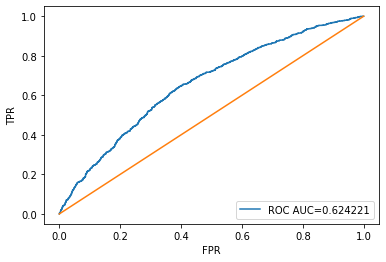

In [337]:
FPR,TPR,tresholds=roc_curve(y_valid,rfclf1.predict_proba(X_valid)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_valid,y_pred_val1))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

**Decision Tree Clasifier**

Checking for the best parameters to be applied to the classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier()
grid_search2 = GridSearchCV(dtclf,param_grid={"max_depth":range(10,50),"min_samples_leaf":range(40,150,20)},scoring="roc_auc",cv=5,n_jobs=-1).fit(X_train,y_train)
params=list(grid_search2.best_params_)

print(grid_search2.best_params_)


Applying the above found parameters to the model



1.  Getting the accuracy and classification report for the training set
2.  Getting the accuracy and classification report for the test set

In [339]:
dtclf1 = DecisionTreeClassifier(max_depth=10,min_samples_leaf=140)

dtclf1 = dtclf1.fit(X_train,y_train)

y_pred = dtclf1.predict(X_train)
print("Training Set Accuracy:",metrics.accuracy_score(y_train, y_pred))
y_pred_val = dtclf1.predict(X_valid)
print("Validation Set Accuracy:",metrics.accuracy_score(y_valid, y_pred_val))

print(classification_report(y_train,dtclf1.predict(X_train)))
print('Classification report for validation set')
print(classification_report(y_valid,dtclf1.predict(X_valid)))

Training Set Accuracy: 0.6377502383222117
Validation Set Accuracy: 0.617123795404003
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      3141
           1       0.64      0.62      0.63      3153

    accuracy                           0.64      6294
   macro avg       0.64      0.64      0.64      6294
weighted avg       0.64      0.64      0.64      6294

Classification report for validation set
              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1355
           1       0.62      0.61      0.61      1343

    accuracy                           0.62      2698
   macro avg       0.62      0.62      0.62      2698
weighted avg       0.62      0.62      0.62      2698



ROC_AUC curve for the above model.

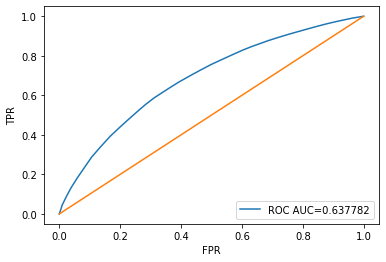

In [340]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve

FPR,TPR,tresholds=roc_curve(y_train,dtclf1.predict_proba(X_train)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_train,y_pred))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

**Testing the model on the test set**

In [350]:
X_test = DiabeticsDF_test.loc[:,DiabeticsDF_test.columns != 'readmitted'] 
y_test = DiabeticsDF_test['readmitted']


dtclf1.fit(X_train,y_train)

y_pred_test = dtclf1.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test,dtclf1.predict(X_test)))

Test Set Accuracy: 0.901498246732547
              precision    recall  f1-score   support

           0       0.93      0.58      0.72     19796
           1       0.14      0.61      0.22      2163

    accuracy                           0.59     21959
   macro avg       0.53      0.60      0.47     21959
weighted avg       0.85      0.59      0.67     21959



ROC_AUC curve for the test model.

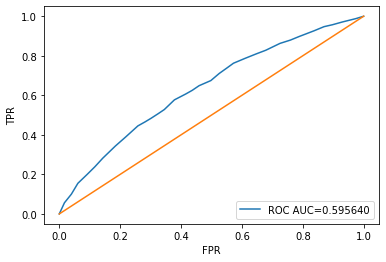

In [351]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import  roc_curve

FPR,TPR,tresholds=roc_curve(y_test,dtclf1.predict_proba(X_test)[:,1])
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,y_pred_test))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()